<a href="https://colab.research.google.com/github/antonsysoev/appl_stat/blob/gh-pages/!!!_Practice_GLM%2BPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
install.packages(c("psych","glmnet"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [32]:
library(psych)
library(glmnet)  # for ridge regression
library(dplyr)   # for data cleaning

In [33]:
data("mtcars")

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”


Parallel analysis suggests that the number of factors =  NA  and the number of components =  2 


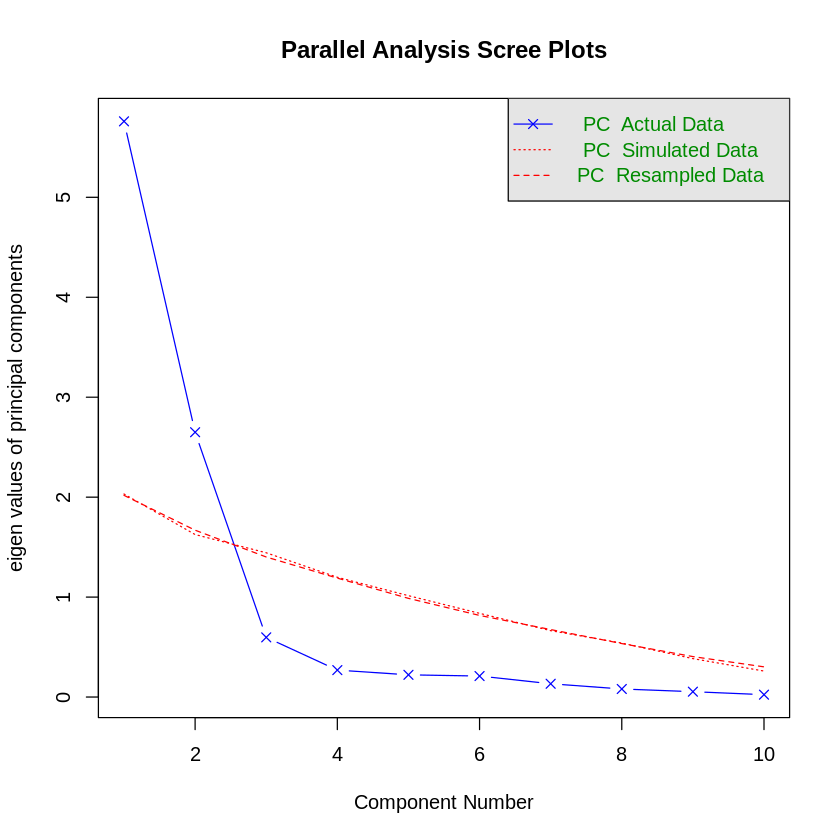

In [37]:
fa.parallel(mtcars %>% select(-mpg), fa="pc")

In [60]:
pc <- principal(mtcars %>% select(-mpg), nfactors = 3)

In [61]:
pc

Principal Components Analysis
Call: principal(r = mtcars %>% select(-mpg), nfactors = 3)
Standardized loadings (pattern matrix) based upon correlation matrix
       RC2   RC1   RC3   h2    u2 com
cyl  -0.62  0.68  0.32 0.95 0.049 2.4
disp -0.72  0.53  0.33 0.91 0.089 2.3
hp   -0.30  0.65  0.62 0.90 0.098 2.4
drat  0.85 -0.27 -0.03 0.79 0.211 1.2
wt   -0.79  0.23  0.49 0.92 0.079 1.9
qsec -0.19 -0.91 -0.27 0.94 0.062 1.3
vs    0.27 -0.87 -0.21 0.88 0.121 1.3
am    0.92  0.13 -0.09 0.88 0.120 1.1
gear  0.91 -0.03  0.28 0.90 0.098 1.2
carb  0.09  0.45  0.85 0.93 0.066 1.5

                       RC2  RC1  RC3
SS loadings           4.13 3.10 1.77
Proportion Var        0.41 0.31 0.18
Cumulative Var        0.41 0.72 0.90
Proportion Explained  0.46 0.34 0.20
Cumulative Proportion 0.46 0.80 1.00

Mean item complexity =  1.7
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RMSR) is  0.03 
 with the empirical chi square  2.45  with prob <  1 

Fit 

In [62]:
pc$weights

,RC2,RC1,RC3
cyl,-0.092398989,0.21811938,-0.06988802
disp,-0.137184488,0.09361280,0.03428021
hp,-0.001739029,0.03601530,0.31426760
drat,0.208405529,-0.08272287,0.15758511
wt,-0.188349838,-0.24508708,0.43031181
qsec,-0.159390711,-0.51174371,0.27062202
vs,-0.023760549,-0.46855168,0.32197975
am,0.273594228,0.25898667,-0.17766704
gear,0.257277857,-0.10686750,0.37838730
carb,0.091599294,-0.22283333,0.73701060


In [63]:
comp

,RC1,RC2
Mazda RX4,36.48984,-22.76595
Mazda RX4 Wag,36.35313,-22.88592
Datsun 710,26.25042,-15.92768
Hornet 4 Drive,43.69576,-38.01929
Hornet Sportabout,68.31162,-51.89544
Valiant,39.34872,-33.63490
Duster 360,83.87770,-51.33714
Merc 240D,23.13635,-21.94014
Merc 230,28.77778,-21.36795
Merc 280,39.18106,-24.44372


In [64]:
comp <- (as.matrix(mtcars %>% select(-mpg)))%*%pc$weights

In [65]:

# Center y, X will be standardized in the modelling function
# y <- mtcars %>% select(mpg) %>% scale(center = TRUE, scale = FALSE) %>% as.matrix()
y <- mtcars %>% select(mpg)  %>% as.matrix()
X <- mtcars %>% select(-mpg) %>% as.matrix()




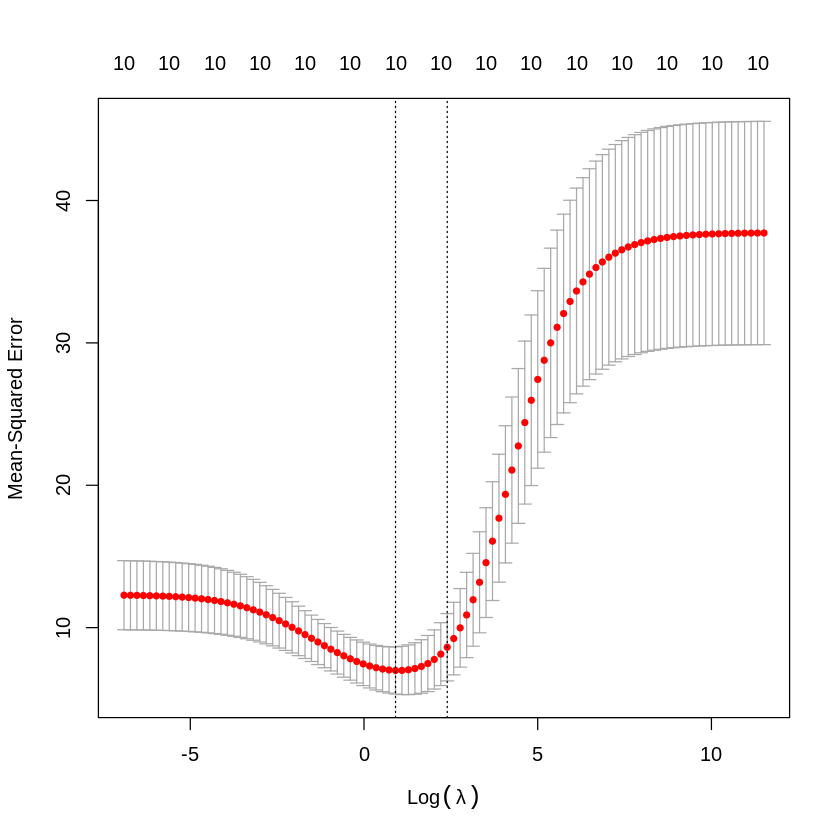

In [66]:
 # Perform 10-fold cross-validation to select lambda ---------------------------
lambdas_to_try <- 10^seq(-3, 5, length.out = 100)
# Setting alpha = 0 implements ridge regression
ridge_cv <- cv.glmnet(X, y, alpha = 0, lambda = lambdas_to_try, nfolds = 10)
# Plot cross-validation results
plot(ridge_cv)

In [67]:
# Best cross-validated lambda
lambda_cv <- ridge_cv$lambda.min
# Fit final model, get its sum of squared residuals and multiple R-squared
model_cv <- glmnet(X, y, alpha = 0, lambda = lambda_cv)


In [68]:
y_hat_cv <- predict(model_cv, X)
ssr_cv <- t(y - y_hat_cv) %*% (y - y_hat_cv)
rsq_ridge_cv <- cor(y, y_hat_cv)[1,1]^2

In [69]:
rsq_ridge_cv

[1] 0.8536968

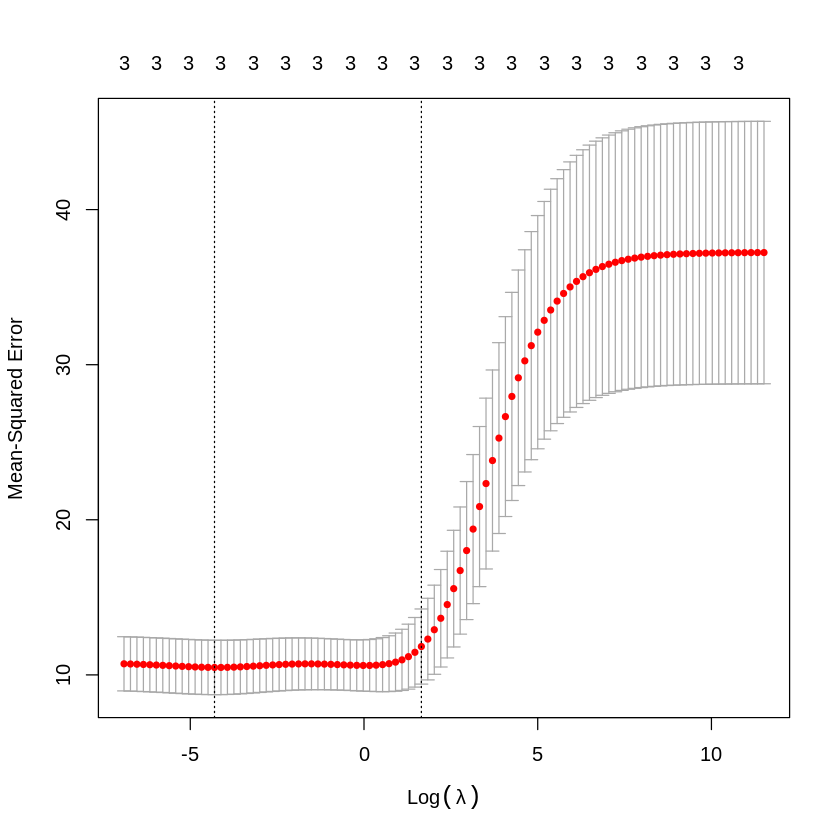

In [70]:

# Center y, X will be standardized in the modelling function
# y <- mtcars %>% select(mpg) %>% scale(center = TRUE, scale = FALSE) %>% as.matrix()
y <- mtcars %>% select(mpg) %>% as.matrix()
X <- comp %>% as.matrix()


# Perform 10-fold cross-validation to select lambda ---------------------------
lambdas_to_try <- 10^seq(-3, 5, length.out = 100)
# Setting alpha = 0 implements ridge regression
ridge_cv <- cv.glmnet(X, y, alpha = 0, lambda = lambdas_to_try, nfolds = 10)
# Plot cross-validation results
plot(ridge_cv)

In [71]:
# Best cross-validated lambda
lambda_cv <- ridge_cv$lambda.min
# Fit final model, get its sum of squared residuals and multiple R-squared
model_cv <- glmnet(X, y, alpha = 0, lambda = lambda_cv)
y_hat_cv <- predict(model_cv, X)
ssr_cv <- t(y - y_hat_cv) %*% (y - y_hat_cv)
rsq_ridge_cv <- cor(y, y_hat_cv)[1,1]^2

In [72]:
rsq_ridge_cv

[1] 0.7711664